## Importing, Understanding and Cleaning of Data

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#importing initial necessary libraries

import pandas as pd
import numpy as np

In [ ]:
#importing datset

df = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk', encoding = "ISO-8859-1")

In [ ]:
#looking at thr first five rows

df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


#### Inspecting various aspects of the dataframe

In [ ]:
df.shape

(3047, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [ ]:
df.isnull().sum() * 100 / len(df)

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P

#### Since PctSomeCol18_24 is having 75%(approx), we can remove this column 

In [ ]:
df = df.drop(['PctSomeCol18_24'], axis = 1) 

#### Since PctPrivateCoverageAlone is having 20%(approx) missing values, we can remove the rows for which this value is missing

In [ ]:
df = df[df['PctPrivateCoverageAlone'].notna()]

In [ ]:
df.isnull().sum() * 100 / len(df)

avgAnnCount                0.000000
avgDeathsPerYear           0.000000
TARGET_deathRate           0.000000
incidenceRate              0.000000
medIncome                  0.000000
popEst2015                 0.000000
povertyPercent             0.000000
studyPerCap                0.000000
binnedInc                  0.000000
MedianAge                  0.000000
MedianAgeMale              0.000000
MedianAgeFemale            0.000000
Geography                  0.000000
AvgHouseholdSize           0.000000
PercentMarried             0.000000
PctNoHS18_24               0.000000
PctHS18_24                 0.000000
PctBachDeg18_24            0.000000
PctHS25_Over               0.000000
PctBachDeg25_Over          0.000000
PctEmployed16_Over         4.347826
PctUnemployed16_Over       0.000000
PctPrivateCoverage         0.000000
PctPrivateCoverageAlone    0.000000
PctEmpPrivCoverage         0.000000
PctPublicCoverage          0.000000
PctPublicCoverageAlone     0.000000
PctWhite                   0

#### Missing values are still there in column PctEmployed16_Over, again removing those rows having missing values in this column

In [ ]:
df = df[df['PctEmployed16_Over'].notna()]

In [ ]:
df.isnull().sum() * 100 / len(df)

avgAnnCount                0.0
avgDeathsPerYear           0.0
TARGET_deathRate           0.0
incidenceRate              0.0
medIncome                  0.0
popEst2015                 0.0
povertyPercent             0.0
studyPerCap                0.0
binnedInc                  0.0
MedianAge                  0.0
MedianAgeMale              0.0
MedianAgeFemale            0.0
Geography                  0.0
AvgHouseholdSize           0.0
PercentMarried             0.0
PctNoHS18_24               0.0
PctHS18_24                 0.0
PctBachDeg18_24            0.0
PctHS25_Over               0.0
PctBachDeg25_Over          0.0
PctEmployed16_Over         0.0
PctUnemployed16_Over       0.0
PctPrivateCoverage         0.0
PctPrivateCoverageAlone    0.0
PctEmpPrivCoverage         0.0
PctPublicCoverage          0.0
PctPublicCoverageAlone     0.0
PctWhite                   0.0
PctBlack                   0.0
PctAsian                   0.0
PctOtherRace               0.0
PctMarriedHouseholds       0.0
BirthRat

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 1 to 3046
Data columns (total 33 columns):
avgAnnCount                2332 non-null float64
avgDeathsPerYear           2332 non-null int64
TARGET_deathRate           2332 non-null float64
incidenceRate              2332 non-null float64
medIncome                  2332 non-null int64
popEst2015                 2332 non-null int64
povertyPercent             2332 non-null float64
studyPerCap                2332 non-null float64
binnedInc                  2332 non-null object
MedianAge                  2332 non-null float64
MedianAgeMale              2332 non-null float64
MedianAgeFemale            2332 non-null float64
Geography                  2332 non-null object
AvgHouseholdSize           2332 non-null float64
PercentMarried             2332 non-null float64
PctNoHS18_24               2332 non-null float64
PctHS18_24                 2332 non-null float64
PctBachDeg18_24            2332 non-null float64
PctHS25_Over       

#### No missing values are present now

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2.332000e+03,2332.000000,2332.000000,2332.000000,2332.000000,...,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000
mean,609.979056,186.875214,178.918053,448.247260,46946.153516,1.035370e+05,16.961149,161.426686,44.927101,39.577058,...,48.372770,41.206861,36.315738,19.319039,83.476877,9.280667,1.244846,2.004873,51.186172,5.658319
std,1440.417501,510.206766,27.482661,53.130088,12073.977204,3.428013e+05,6.432940,572.346543,43.753626,5.171276,...,10.074237,9.443126,7.825269,6.149097,16.548321,14.713473,2.611690,3.726981,6.569481,2.058395
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,75.000000,28.000000,161.400000,420.900000,38592.000000,1.154125e+04,12.200000,0.000000,37.800000,36.400000,...,40.900000,34.375000,30.900000,14.900000,77.027318,0.634472,0.244695,0.290405,47.729039,4.511463
50%,173.000000,62.000000,178.600000,453.549422,45079.000000,2.692300e+04,16.000000,0.000000,40.900000,39.600000,...,48.600000,41.100000,36.450000,18.850000,89.977678,2.324848,0.540446,0.802435,51.696494,5.374201
75%,517.250000,145.250000,195.325000,480.425000,52350.500000,6.803800e+04,20.600000,79.990393,43.900000,42.600000,...,55.500000,47.700000,41.800000,23.300000,95.463496,11.085164,1.199038,2.171349,55.344955,6.508864
max,38150.000000,14010.000000,293.900000,1014.200000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,60.200000,...,78.900000,70.700000,62.700000,46.600000,100.000000,85.947799,42.619425,41.930251,71.703057,21.326165


In [ ]:
#Checking for IQR, since we can figure out a lot of outliers present in the dataset

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

avgAnnCount                  442.250000
avgDeathsPerYear             117.250000
TARGET_deathRate              33.925000
incidenceRate                 59.525000
medIncome                  13758.500000
popEst2015                 56496.750000
povertyPercent                 8.400000
studyPerCap                   79.990393
MedianAge                      6.100000
MedianAgeMale                  6.200000
MedianAgeFemale                6.100000
AvgHouseholdSize               0.260000
PercentMarried                 8.600000
PctNoHS18_24                  10.100000
PctHS18_24                    11.400000
PctBachDeg18_24                5.000000
PctHS25_Over                   9.000000
PctBachDeg25_Over              6.500000
PctEmployed16_Over            11.525000
PctUnemployed16_Over           4.100000
PctPrivateCoverage            15.125000
PctPrivateCoverageAlone       14.600000
PctEmpPrivCoverage            13.325000
PctPublicCoverage             10.900000
PctPublicCoverageAlone         8.400000


In [ ]:
df_out = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(944, 33)


## I want to state a point over here, since i don't have business understanding related to the dataset given i can't decide which variables are important for me and which are not so that is why i have decided to remove all the data points which were outliers and did not considered the importance of that variable. 


## If you want to treat outlier and not remove them, I am doing it in one way (Capping) below, you can explore other ways

In [ ]:
df.skew()

avgAnnCount                10.852524
avgDeathsPerYear           12.086274
TARGET_deathRate            0.176615
incidenceRate              -0.016202
medIncome                   1.441171
popEst2015                 14.741562
povertyPercent              0.945489
studyPerCap                 8.640821
MedianAge                  10.457288
MedianAgeMale               0.098081
MedianAgeFemale            -0.236170
AvgHouseholdSize           -3.441399
PercentMarried             -0.688005
PctNoHS18_24                0.942008
PctHS18_24                  0.204684
PctBachDeg18_24             2.110282
PctHS25_Over               -0.341117
PctBachDeg25_Over           1.138598
PctEmployed16_Over         -0.364232
PctUnemployed16_Over        0.956774
PctPrivateCoverage         -0.382789
PctPrivateCoverageAlone    -0.011272
PctEmpPrivCoverage          0.097200
PctPublicCoverage          -0.047304
PctPublicCoverageAlone      0.463558
PctWhite                   -1.673339
PctBlack                    2.249444
P

In [ ]:
col = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
for x in col:
    ten = df[x].quantile(0.10)
    nin = df[x].quantile(0.90)
    df[x] = np.where(df[x] < ten, ten,df[x])
    df[x] = np.where(df[x] > nin, nin,df[x])

In [ ]:
df.skew()

avgAnnCount                1.637213
avgDeathsPerYear           1.322061
TARGET_deathRate           0.076585
incidenceRate             -0.247302
medIncome                  0.308420
popEst2015                 1.458895
povertyPercent             0.325621
studyPerCap                1.665699
MedianAge                  0.027977
MedianAgeMale              0.026105
MedianAgeFemale           -0.088244
AvgHouseholdSize           0.196529
PercentMarried            -0.194958
PctNoHS18_24               0.261958
PctHS18_24                 0.022854
PctBachDeg18_24            0.386740
PctHS25_Over              -0.112480
PctBachDeg25_Over          0.425570
PctEmployed16_Over        -0.096057
PctUnemployed16_Over       0.175450
PctPrivateCoverage        -0.140704
PctPrivateCoverageAlone   -0.003782
PctEmpPrivCoverage         0.037438
PctPublicCoverage         -0.034643
PctPublicCoverageAlone     0.116176
PctWhite                  -0.885286
PctBlack                   1.347077
PctAsian                   1

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,...,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000,2332.000000
mean,469.082597,109.530532,178.816012,449.315587,46057.169554,55113.109605,16.667007,74.940148,40.949528,39.548671,...,48.377573,41.156389,36.332264,19.136381,84.943093,7.701979,0.872734,1.431522,51.355112,5.548888
std,628.471413,112.548608,21.469822,39.367407,8626.632061,63234.224956,5.072359,134.793166,4.037509,3.964389,...,8.585212,8.083983,6.492177,4.985931,12.586433,10.199009,0.857901,1.475847,4.904866,1.384795
min,36.000000,13.000000,146.110000,381.020000,34116.000000,5660.200000,9.900000,0.000000,34.600000,33.300000,...,35.210000,28.900000,26.210000,11.810000,60.052071,0.243946,0.055310,0.089733,42.988371,3.535025
25%,75.000000,28.000000,161.400000,420.900000,38592.000000,11541.250000,12.200000,0.000000,37.800000,36.400000,...,40.900000,34.375000,30.900000,14.900000,77.027318,0.634472,0.244695,0.290405,47.729039,4.511463
50%,173.000000,62.000000,178.600000,453.549422,45079.000000,26923.000000,16.000000,0.000000,40.900000,39.600000,...,48.600000,41.100000,36.450000,18.850000,89.977678,2.324848,0.540446,0.802435,51.696494,5.374201
75%,517.250000,145.250000,195.325000,480.425000,52350.500000,68038.000000,20.600000,79.990393,43.900000,42.600000,...,55.500000,47.700000,41.800000,23.300000,95.463496,11.085164,1.199038,2.171349,55.344955,6.508864
max,1962.667684,366.800000,213.500000,507.590000,61151.100000,203405.200000,25.390000,402.472716,47.500000,45.900000,...,61.590000,53.800000,46.300000,27.100000,97.203350,30.463769,2.793172,4.591856,58.546962,8.043930


In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

avgAnnCount                  442.250000
avgDeathsPerYear             117.250000
TARGET_deathRate              33.925000
incidenceRate                 59.525000
medIncome                  13758.500000
popEst2015                 56496.750000
povertyPercent                 8.400000
studyPerCap                   79.990393
MedianAge                      6.100000
MedianAgeMale                  6.200000
MedianAgeFemale                6.100000
AvgHouseholdSize               0.260000
PercentMarried                 8.600000
PctNoHS18_24                  10.100000
PctHS18_24                    11.400000
PctBachDeg18_24                5.000000
PctHS25_Over                   9.000000
PctBachDeg25_Over              6.500000
PctEmployed16_Over            11.525000
PctUnemployed16_Over           4.100000
PctPrivateCoverage            15.125000
PctPrivateCoverageAlone       14.600000
PctEmpPrivCoverage            13.325000
PctPublicCoverage             10.900000
PctPublicCoverageAlone         8.400000


In [ ]:
df_out2 = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df_out2.shape)

(1348, 33)


#### So now i will be moving on with df_out2 dataframe, Removal of outliers and missing value is done, cleaned the data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#visulising numeric data using pair plot is of no use since there are a lot of numeric data type columss
#lets check categorical variables binnedInc and geography

df_out2.binnedInc.unique()

array(['(48021.6, 51046.4]', '(51046.4, 54545.6]', '(37413.8, 40362.7]',
       '(40362.7, 42724.4]', '(42724.4, 45201]', '(34218.1, 37413.8]',
       '[22640, 34218.1]', '(61494.5, 125635]', '(45201, 48021.6]',
       '(54545.6, 61494.5]'], dtype=object)

In [ ]:
# Defining the map function
varlist = ['binnedInc']
def mmap(x):
    return x.map({'[22640, 34218.1]': 'BI1', "(34218.1, 37413.8]": 'BI2', '(37413.8, 40362.7]':'BI3', 
                  '(40362.7, 42724.4]':'BI4', '(42724.4, 45201]':'BI5', '(45201, 48021.6]':'BI6', 
                  '(48021.6, 51046.4]':'BI7', '(51046.4, 54545.6]':'BI8', '(54545.6, 61494.5]':'BI9', 
                  '(61494.5, 125635]':'BI10' })

# Applying the function to the housing list
df_out2[varlist] = df_out2[varlist].apply(mmap)

In [ ]:
df_out2.binnedInc.unique()

array(['BI7', 'BI8', 'BI3', 'BI4', 'BI5', 'BI2', 'BI1', 'BI10', 'BI6',
       'BI9'], dtype=object)

In [ ]:
df_out2.Geography.value_counts()

Okfuskee County, Oklahoma           1
King William County, Virginia       1
Bailey County, Texas                1
Johnson County, Arkansas            1
Menominee County, Wisconsin         1
Bossier Parish, Louisiana           1
Warren County, Indiana              1
Shelby County, Illinois             1
Montgomery County, Indiana          1
Mineral County, Montana             1
Todd County, Kentucky               1
Charlevoix County, Michigan         1
Bowman County, North Dakota         1
Tipton County, Tennessee            1
Dent County, Missouri               1
Hamilton County, Illinois           1
Susquehanna County, Pennsylvania    1
Fulton County, Indiana              1
Tuscarawas County, Ohio             1
Dubois County, Indiana              1
McKean County, Pennsylvania         1
Palo Alto County, Iowa              1
Keokuk County, Iowa                 1
Clinch County, Georgia              1
Carlisle County, Kentucky           1
Warren County, Virginia             1
Rock County,

#### Since mostly geography is unique in every row we may drop this column

In [ ]:
df_out2 = df_out2.drop(['Geography'], axis = 1) 

### Dummy Variables

In [ ]:
status = pd.get_dummies(df_out2['binnedInc'], drop_first = True)
status.head()

,BI10,BI2,BI3,BI4,BI5,BI6,BI7,BI8,BI9
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0
6,0,0,1,0,0,0,0,0,0


In [ ]:
df_out2 = pd.concat([df_out2, status], axis = 1)

In [ ]:
df_out2.drop(['binnedInc'], axis = 1, inplace = True)

In [ ]:
df_out2.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,BI10,BI2,BI3,BI4,BI5,BI6,BI7,BI8,BI9
1,173.0,70.0,161.30,411.60,48127.0,43269.0,18.6,23.111234,34.6,33.3,...,4.333096,0,0,0,0,0,0,1,0,0
2,102.0,50.0,174.70,381.02,49348.0,21026.0,14.6,47.560164,45.0,44.0,...,3.729488,0,0,0,0,0,0,1,0,0
4,57.0,26.0,146.11,381.02,49955.0,10321.0,12.5,0.000000,47.5,45.9,...,6.796657,0,0,0,0,0,0,1,0,0
5,428.0,152.0,176.00,505.40,52313.0,61023.0,15.6,180.259902,45.4,43.5,...,4.964476,0,0,0,0,0,0,0,1,0
6,250.0,97.0,175.90,461.80,37782.0,41516.0,23.2,0.000000,42.6,42.2,...,4.204317,0,0,1,0,0,0,0,0,0


# Training Testing Split

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_out2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#will be scaling all continuous variables
var = df_train.columns.tolist()
var

['avgAnnCount',
 'avgDeathsPerYear',
 'TARGET_deathRate',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctPrivateCoverageAlone',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate',
 'BI10',
 'BI2',
 'BI3',
 'BI4',
 'BI5',
 'BI6',
 'BI7',
 'BI8',
 'BI9']

In [ ]:
bin_vars = ['BI10', 'BI2', 'BI3', 'BI4', 'BI5', 'BI6', 'BI7', 'BI8', 'BI9']

In [ ]:
con_vars = set(var) - set(bin_vars)

con_vars = list(con_vars)

con_vars

['avgDeathsPerYear',
 'PctBachDeg18_24',
 'PctMarriedHouseholds',
 'avgAnnCount',
 'PctUnemployed16_Over',
 'PctAsian',
 'PctPublicCoverage',
 'PctPrivateCoverage',
 'popEst2015',
 'PctHS18_24',
 'povertyPercent',
 'PctPrivateCoverageAlone',
 'PctHS25_Over',
 'MedianAgeFemale',
 'PctWhite',
 'AvgHouseholdSize',
 'incidenceRate',
 'PctBachDeg25_Over',
 'studyPerCap',
 'MedianAgeMale',
 'PctEmpPrivCoverage',
 'TARGET_deathRate',
 'medIncome',
 'PctEmployed16_Over',
 'PctPublicCoverageAlone',
 'PctNoHS18_24',
 'PctBlack',
 'BirthRate',
 'MedianAge',
 'PctOtherRace',
 'PercentMarried']

In [ ]:
df_train[con_vars] = scaler.fit_transform(df_train[con_vars])

In [ ]:
df_train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,BI10,BI2,BI3,BI4,BI5,BI6,BI7,BI8,BI9
1159,0.086165,0.077922,0.000000,0.250296,0.538818,0.100935,0.116204,0.00000,0.658915,0.722222,...,0.668864,0,0,0,0,0,0,1,0,0
835,0.245146,0.256494,0.655735,0.709331,0.985201,0.321684,0.142027,0.19384,0.201550,0.214286,...,0.571362,0,0,0,0,0,0,0,0,1
1445,0.064320,0.084416,0.637928,0.424113,0.159163,0.069661,0.852163,0.00000,0.674419,0.634921,...,0.299926,0,0,1,0,0,0,0,0,0
2227,0.158981,0.181818,0.777415,0.917911,0.275975,0.133116,0.400258,0.00000,0.589147,0.587302,...,0.318780,0,0,0,1,0,0,0,0,0
2162,0.064320,0.064935,0.670574,1.000000,0.065175,0.061243,0.606843,0.00000,0.449612,0.476190,...,0.799680,0,1,0,0,0,0,0,0,0


In [ ]:
df_train.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,BI10,BI2,BI3,BI4,BI5,BI6,BI7,BI8,BI9
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,0.154023,0.174953,0.501790,0.501659,0.410995,0.166354,0.429230,0.065368,0.550437,0.560378,...,0.454052,0.065748,0.112407,0.128314,0.111347,0.118770,0.103924,0.100742,0.080594,0.093319
std,0.179556,0.190067,0.324935,0.334278,0.297022,0.192196,0.305570,0.184944,0.299309,0.300084,...,0.325410,0.247972,0.316034,0.334616,0.314728,0.323689,0.305323,0.301147,0.272355,0.291034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023058,0.035714,0.229114,0.216323,0.159718,0.027540,0.167850,0.000000,0.341085,0.357143,...,0.180400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092233,0.116883,0.505861,0.512602,0.365081,0.100505,0.387347,0.000000,0.550388,0.555556,...,0.420995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.218447,0.253247,0.768512,0.777277,0.615015,0.237275,0.658489,0.000000,0.782946,0.801587,...,0.715747,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


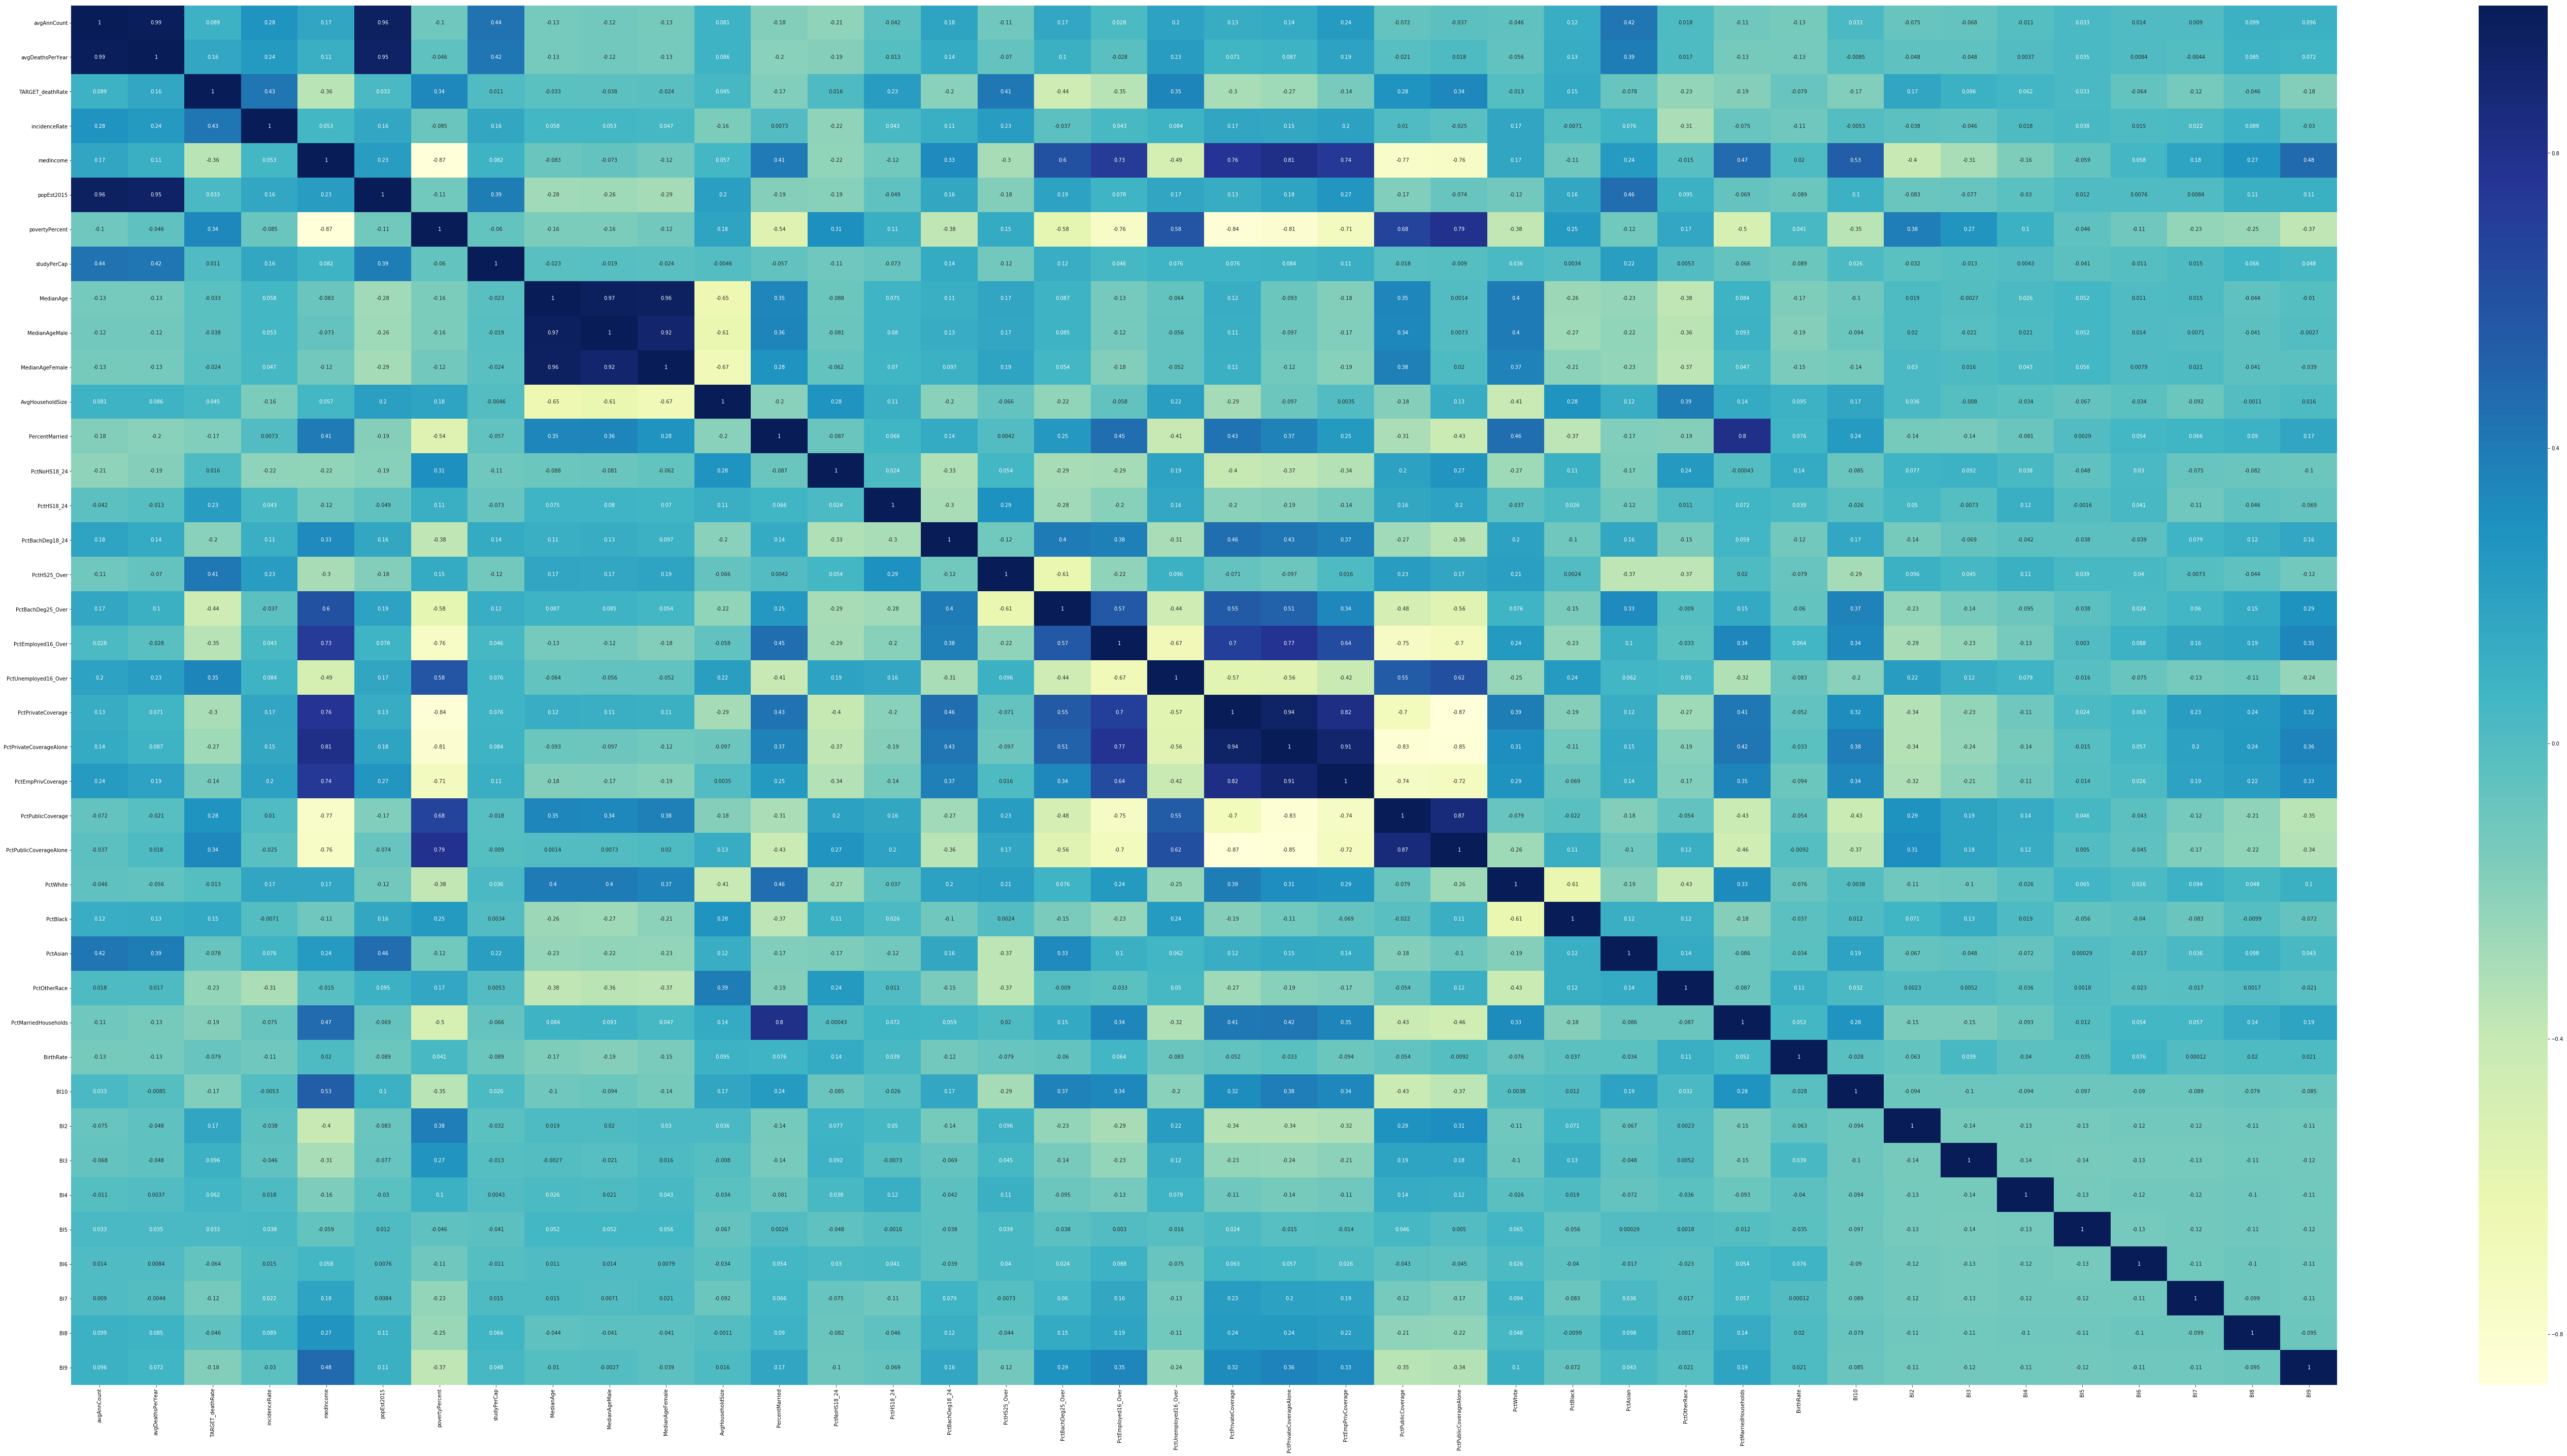

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (100, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Model Building

In [ ]:
y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

In [ ]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                      0.477953
avgAnnCount               -5.065736
avgDeathsPerYear           4.747157
incidenceRate              0.468833
medIncome                  0.315416
popEst2015                -0.006729
povertyPercent            -0.073564
studyPerCap                0.069910
MedianAge                  0.034678
MedianAgeMale             -0.109428
MedianAgeFemale            0.000759
AvgHouseholdSize           0.016972
PercentMarried             0.162154
PctNoHS18_24              -0.022086
PctHS18_24                 0.033804
PctBachDeg18_24           -0.020034
PctHS25_Over               0.156264
PctBachDeg25_Over         -0.014574
PctEmployed16_Over        -0.112340
PctUnemployed16_Over       0.057618
PctPrivateCoverage        -0.291955
PctPrivateCoverageAlone   -0.034688
PctEmpPrivCoverage         0.123249
PctPublicCoverage         -0.166569
PctPublicCoverageAlone     0.001181
PctWhite                   0.017678
PctBlack                   0.088760
PctAsian                   0

In [ ]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     37.81
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.47e-161
Time:                        13:11:35   Log-Likelihood:                 179.00
No. Observations:                 943   AIC:                            -278.0
Df Residuals:                     903   BIC:                            -84.03
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', False, 18),
 ('povertyPercent', True, 1),
 ('studyPerCap', False, 5),
 ('MedianAge', False, 11),
 ('MedianAgeMale', True, 1),
 ('MedianAgeFemale', False, 20),
 ('AvgHouseholdSize', False, 16),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', False, 13),
 ('PctHS18_24', False, 9),
 ('PctBachDeg18_24', False, 14),
 ('PctHS25_Over', True, 1),
 ('PctBachDeg25_Over', False, 17),
 ('PctEmployed16_Over', True, 1),
 ('PctUnemployed16_Over', False, 6),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 10),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', False, 19),
 ('PctWhite', False, 15),
 ('PctBlack', True, 1),
 ('PctAsian', False, 7),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 12),
 ('BI10', True, 1),
 ('BI2', False, 8),
 ('BI3', False, 4),
 ('BI4', True, 1

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'povertyPercent', 'MedianAgeMale', 'PercentMarried', 'PctHS25_Over',
       'PctEmployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctBlack', 'PctOtherRace', 'PctMarriedHouseholds',
       'BI10', 'BI4', 'BI6', 'BI7', 'BI9'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['popEst2015', 'studyPerCap', 'MedianAge', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctBachDeg25_Over', 'PctUnemployed16_Over', 'PctPrivateCoverageAlone',
       'PctPublicCoverageAlone', 'PctWhite', 'PctAsian', 'BirthRate', 'BI2',
       'BI3', 'BI5', 'BI8'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     72.32
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          4.42e-173
Time:                        13:11:36   Log-Likelihood:                 167.33
No. Observations:                 943   AIC:                            -292.7
Df Residuals:                     922   BIC:                            -190.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4784 

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     72.32
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          4.42e-173
Time:                        13:11:36   Log-Likelihood:                 167.33
No. Observations:                 943   AIC:                            -292.7
Df Residuals:                     922   BIC:                            -190.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4784 

In [ ]:
X_train_rfe.columns

Index(['const', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'povertyPercent', 'MedianAgeMale', 'PercentMarried',
       'PctHS25_Over', 'PctEmployed16_Over', 'PctPrivateCoverage',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctBlack', 'PctOtherRace',
       'PctMarriedHouseholds', 'BI10', 'BI4', 'BI6', 'BI7', 'BI9'],
      dtype='object')

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,avgDeathsPerYear,100.03
0,avgAnnCount,97.98
6,PercentMarried,33.65
14,PctMarriedHouseholds,27.64
3,medIncome,24.51
9,PctPrivateCoverage,19.96
11,PctPublicCoverage,16.93
10,PctEmpPrivCoverage,16.04
4,povertyPercent,11.45
8,PctEmployed16_Over,11.12


In [ ]:
X_train_rfe = X_train_rfe.drop(["BI9"], axis = 1)

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     76.20
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          5.13e-174
Time:                        13:11:37   Log-Likelihood:                 167.30
No. Observations:                 943   AIC:                            -294.6
Df Residuals:                     923   BIC:                            -197.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4818 

In [ ]:
X_train_rfe = X_train_rfe.drop(["povertyPercent"], axis = 1)

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     80.34
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.08e-174
Time:                        13:11:37   Log-Likelihood:                 166.64
No. Observations:                 943   AIC:                            -295.3
Df Residuals:                     924   BIC:                            -203.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4069 

In [ ]:
X_train_rfe = X_train_rfe.drop(["medIncome"], axis = 1)

In [ ]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     85.00
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.91e-175
Time:                        13:11:37   Log-Likelihood:                 166.11
No. Observations:                 943   AIC:                            -296.2
Df Residuals:                     925   BIC:                            -208.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3998 

In [ ]:
X_train_rfe = X_train_rfe.drop(["BI10"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     90.17
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          4.17e-176
Time:                        13:11:37   Log-Likelihood:                 165.34
No. Observations:                 943   AIC:                            -296.7
Df Residuals:                     926   BIC:                            -214.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4063 

In [ ]:
X_train_rfe = X_train_rfe.drop(["BI4"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     95.68
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          2.45e-176
Time:                        13:11:38   Log-Likelihood:                 163.53
No. Observations:                 943   AIC:                            -295.1
Df Residuals:                     927   BIC:                            -217.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4024 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,avgDeathsPerYear,97.18
0,avgAnnCount,95.14
4,PercentMarried,32.27
12,PctMarriedHouseholds,23.92
7,PctPrivateCoverage,18.67
8,PctEmpPrivCoverage,14.68
3,MedianAgeMale,10.07
6,PctEmployed16_Over,9.43
9,PctPublicCoverage,9.12
5,PctHS25_Over,7.64


In [ ]:
X_train_rfe = X_train_rfe.drop(["avgDeathsPerYear"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     56.93
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.71e-114
Time:                        13:11:38   Log-Likelihood:                 14.791
No. Observations:                 943   AIC:                            0.4189
Df Residuals:                     928   BIC:                             73.15
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5422 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PercentMarried,31.96
11,PctMarriedHouseholds,23.78
6,PctPrivateCoverage,18.58
7,PctEmpPrivCoverage,14.60
2,MedianAgeMale,10.01
5,PctEmployed16_Over,9.39
8,PctPublicCoverage,8.75
4,PctHS25_Over,7.17
1,incidenceRate,4.29
0,avgAnnCount,2.24


In [ ]:
X_train_rfe = X_train_rfe.drop(["PctEmpPrivCoverage"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     59.91
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          3.34e-113
Time:                        13:11:38   Log-Likelihood:                 9.5913
No. Observations:                 943   AIC:                             8.817
Df Residuals:                     929   BIC:                             76.70
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5832 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PercentMarried,30.69
10,PctMarriedHouseholds,22.55
6,PctPrivateCoverage,11.25
2,MedianAgeMale,9.71
5,PctEmployed16_Over,9.03
7,PctPublicCoverage,8.53
4,PctHS25_Over,6.41
1,incidenceRate,4.24
9,PctOtherRace,2.14
0,avgAnnCount,2.11


In [ ]:
X_train_rfe = X_train_rfe.drop(["PctBlack"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     64.52
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.77e-113
Time:                        13:11:39   Log-Likelihood:                 8.0784
No. Observations:                 943   AIC:                             9.843
Df Residuals:                     930   BIC:                             72.88
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6242 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PercentMarried,29.11
9,PctMarriedHouseholds,21.61
6,PctPrivateCoverage,11.23
2,MedianAgeMale,9.71
5,PctEmployed16_Over,9.03
7,PctPublicCoverage,8.48
4,PctHS25_Over,6.30
1,incidenceRate,4.21
0,avgAnnCount,2.09
8,PctOtherRace,2.08


In [ ]:
X_train_rfe = X_train_rfe.drop(["PercentMarried"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     68.44
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          8.46e-112
Time:                        13:11:39   Log-Likelihood:                 1.9070
No. Observations:                 943   AIC:                             20.19
Df Residuals:                     931   BIC:                             78.37
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5821 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,PctPrivateCoverage,10.85
6,PctPublicCoverage,8.47
2,MedianAgeMale,7.77
4,PctEmployed16_Over,7.19
8,PctMarriedHouseholds,7.01
3,PctHS25_Over,6.15
1,incidenceRate,4.16
7,PctOtherRace,2.04
0,avgAnnCount,2.02
10,BI7,1.20


In [ ]:
X_train_rfe = X_train_rfe.drop(["PctPrivateCoverage"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     66.22
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.38e-101
Time:                        13:11:39   Log-Likelihood:                -24.397
No. Observations:                 943   AIC:                             70.79
Df Residuals:                     932   BIC:                             124.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4308 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,PctPublicCoverage,7.12
2,MedianAgeMale,6.53
7,PctMarriedHouseholds,6.50
3,PctHS25_Over,6.05
4,PctEmployed16_Over,4.83
1,incidenceRate,4.01
6,PctOtherRace,2.02
0,avgAnnCount,1.91
9,BI7,1.16
8,BI6,1.15


In [ ]:
X_train_rfe = X_train_rfe.drop(["PctPublicCoverage"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     73.41
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          3.03e-102
Time:                        13:11:39   Log-Likelihood:                -25.075
No. Observations:                 943   AIC:                             70.15
Df Residuals:                     933   BIC:                             118.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4739 

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,PctMarriedHouseholds,6.46
3,PctHS25_Over,4.84
2,MedianAgeMale,4.06
1,incidenceRate,3.86
4,PctEmployed16_Over,3.82
0,avgAnnCount,1.89
5,PctOtherRace,1.55
8,BI7,1.16
7,BI6,1.15


In [ ]:
X_train_rfe = X_train_rfe.drop(["PctMarriedHouseholds"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     81.95
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.74e-102
Time:                        13:11:40   Log-Likelihood:                -26.790
No. Observations:                 943   AIC:                             71.58
Df Residuals:                     934   BIC:                             115.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4488      0

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PctHS25_Over,4.33
1,incidenceRate,3.86
2,MedianAgeMale,3.61
4,PctEmployed16_Over,2.75
0,avgAnnCount,1.89
5,PctOtherRace,1.47
7,BI7,1.16
6,BI6,1.15


In [ ]:
X_train_rfe = X_train_rfe.drop(["avgAnnCount"], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     93.72
Date:                Sat, 05 Sep 2020   Prob (F-statistic):          1.83e-103
Time:                        13:11:40   Log-Likelihood:                -26.847
No. Observations:                 943   AIC:                             69.69
Df Residuals:                     935   BIC:                             108.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4516      0

In [ ]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,PctHS25_Over,4.32
1,MedianAgeMale,3.61
0,incidenceRate,3.29
3,PctEmployed16_Over,2.73
4,PctOtherRace,1.41
6,BI7,1.16
5,BI6,1.15
